# Classification Problem (Medical Appointment show up or not)

In this project we will go over:

1: Data Loading

2: Basic Exploratory Data Analysis

3: Data Pre-Processing

4: Model Evaluation

7: Testing the Model Performance

## Data

1. PatientID: Identifcation of a patient.
2. AppointmentID: Identifcation of each appointment.
3. Gender: Male or Female.
4. ScheduledDay: The day of the actuall appointment.
5. AppointmentDay : The day someone called or registered the appointment.
6. Age : Age of the patient.
7. Neighbourhood : Where the appointment takes place.
8. Scholarship : True or false.
9. Hypertension : True or false.
10. Diabetes : True or false.
11. Alcoholism : True or false.
12. Handicap : True or false.
13. SMS received : 1 or more messages sent to the patient.
14. No-show : True or false. This is the target.

In [1]:

import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
dataFrame=pd.read_csv("medical_appointment_train.csv")

In [3]:
dataFrame.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#check for missing values

dataFrame.isnull().sum()

PatientID         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

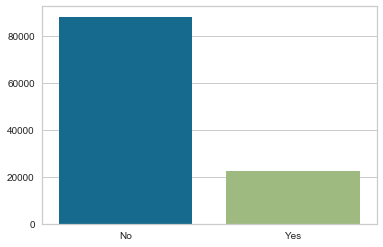

In [235]:
# lets visualize the count of show up or not
groups = dataFrame.groupby(['No-show'])
gps = groups.size()
ax = sns.barplot(x=gps.index.tolist(), y=gps.values)

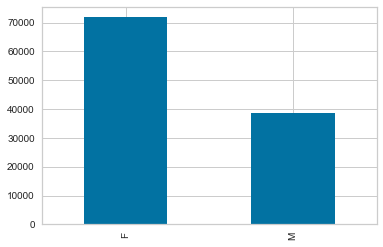

In [236]:
dataFrame['Gender'].value_counts().plot(kind='bar')

In [237]:
dataFrame = dataFrame.rename(columns={"No-show": "No_show"})
dataFrame.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [238]:
from sklearn import preprocessing

#Label Encoding of Gender, Neighbourhood, No-show handcap

label_encode = preprocessing.LabelEncoder()

label_encode.fit(dataFrame["Gender"])
dataFrame["Gender"]=label_encode.transform(dataFrame["Gender"])

label_encode.fit(dataFrame["No_show"])
dataFrame["No_show"]=label_encode.transform(dataFrame["No_show"])

label_encode.fit(dataFrame["Neighbourhood"])
dataFrame["Neighbourhood"]=label_encode.transform(dataFrame["Neighbourhood"])


dataFrame.head(10)

# In age column (0:F and 1:M) and in No_show column (0:No and 1: Yes)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0
5,9.598513e+13,5626772,0,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,58,0,1,0,0,0,0,0
6,7.336882e+14,5630279,0,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,25,0,0,0,0,0,0,1
7,3.449833e+12,5630575,0,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,25,0,0,0,0,0,0,1
8,5.639473e+13,5638447,0,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,1,0,0,0,0,0,0,0
9,7.812456e+13,5629123,0,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,12,0,0,0,0,0,0,0


### Lets have a look on the unique values of the attributes

In [239]:
print('Age:',sorted(dataFrame.Age.unique()))
print('Gender:',dataFrame.Gender.unique())
print("Neighbourhood",dataFrame.Neighbourhood.unique())
print('Scholarship:',dataFrame.Scholarship.unique())
print('Hypertension:',dataFrame.Hypertension.unique())
print('Diabetes:',dataFrame.Diabetes.unique())
print('Alcoholism:',dataFrame.Alcoholism.unique())
print('Handicap:',dataFrame.Handicap.unique())
print('SMS_received:',dataFrame.SMS_received.unique())
print('No_show:',dataFrame.No_show.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: [0 1]
Neighbourhood [39 45 54 58 25  1 12 50 15 78  6 77 66 75 44 26 74 29 68 73  8 38 43 37
  2 59 30 42 46 48 69  5 56 63 36 35 79 76 57 62 10 52 18 70  9  3 32 27
 41 13 55  7 47 64 65  4 21 23 22 20 71 53 40 67 14 33 60 11 61 80 16 19
 17 28 72 31 24 49  0 34 51]
Scholarship: [0 1]
Hypertension: [1 0]
Diabetes: [0 1]
Alcoholism: [0 1]
Handicap: [0 1 2 3 4]
SMS_received: [0 1]
No_show: [0 1]


In [240]:
dataFrame.Handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [241]:
# delete rows with abnormal value:Handicap > 1, 199 rows were deleted
dataFrame.drop(dataFrame[dataFrame.Handicap > 1].index, inplace=True)
dataFrame.Handicap.value_counts()

0    108286
1      2042
Name: Handicap, dtype: int64

In [242]:
dataFrame["appointmentDay"] = dataFrame.AppointmentDay.apply(lambda x : x.split("T")[0])

In [243]:
dataFrame["appointmentDay"].head()

0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: appointmentDay, dtype: object

In [244]:
dataFrame["scheduledDay"] = dataFrame.ScheduledDay.apply(lambda x : x.split("T")[0])

In [245]:
dataFrame["scheduledDay"].head()

0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: scheduledDay, dtype: object

### Lets add one new column Weekday to check the the exact day of appointment

In [246]:
dataFrame["weekday"] = dataFrame.appointmentDay.apply(lambda dateString : calendar.day_name
                                           [datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [247]:
dataFrame.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,appointmentDay,scheduledDay,weekday
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0,2016-04-29,2016-04-29,Friday
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0,2016-04-29,2016-04-29,Friday
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0,2016-04-29,2016-04-29,Friday
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0,2016-04-29,2016-04-29,Friday
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0,2016-04-29,2016-04-29,Friday


In [248]:
print(f"Total of Unique Patients is {dataFrame.PatientID.nunique()} and Appointments is {dataFrame.AppointmentID.nunique()}")

Total of Unique Patients is 62191 and Appointments is 110328


In [249]:
label_encode.fit(dataFrame["weekday"])
dataFrame["weekday"]=label_encode.transform(dataFrame["weekday"])

In [250]:
dataFrame["weekday"].head()

0    0
1    0
2    0
3    0
4    0
Name: weekday, dtype: int32

In [251]:
dataFrame.dtypes

PatientID         float64
AppointmentID       int64
Gender              int32
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood       int32
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No_show             int32
appointmentDay     object
scheduledDay       object
weekday             int32
dtype: object

In [252]:

print(sorted(dataFrame.Age.unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [253]:
dataFrame.drop(dataFrame[dataFrame.Age < 0].index, inplace=True)

In [254]:
print('Age:',sorted(dataFrame.Age.unique()))
print('Gender:',dataFrame.Gender.unique())
print("Neighbourhood",sorted(dataFrame.Neighbourhood.unique()))
print('Scholarship:',dataFrame.Scholarship.unique())
print('Hypertension:',dataFrame.Hypertension.unique())
print('Diabetes:',dataFrame.Diabetes.unique())
print('Alcoholism:',dataFrame.Alcoholism.unique())
print('Handicap:',dataFrame.Handicap.unique())
print('SMS_received:',dataFrame.SMS_received.unique())
print('No_show:',dataFrame.No_show.unique())
print('weekday:',sorted(dataFrame.weekday.unique()))

Age: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: [0 1]
Neighbourhood [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
Scholarship: [0 1]
Hypertension: [1 0]
Diabetes: [0 1]
Alcoholism: [0 1]
Handicap: [0 1]
SMS_received: [0 1]
No_show: [0 1]
weekday: [0, 1, 2, 3, 4, 5]


### Lets calculate the wait time/days and add a new column which is basically the time difference of appointment day and scheculed day.

In [255]:
dataFrame['waitdays'] = pd.to_datetime(dataFrame['AppointmentDay'])- pd.to_datetime(dataFrame['ScheduledDay'])

In [256]:
dataFrame['waitdays'] = dataFrame['waitdays'].apply(lambda x: x.days)

In [257]:
print(sorted(dataFrame.waitdays.unique()))

[-7, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 114, 116, 118, 121, 122, 124, 125, 126, 131, 132, 138, 141, 145, 150, 154, 161, 168, 175, 178]


In [258]:
dataFrame['waitdays'].describe()

count    110327.000000
mean          9.186971
std          15.257836
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: waitdays, dtype: float64

In [259]:
# drop them
dataFrame.drop(dataFrame[dataFrame.waitdays < -1].index, inplace=True)

In [260]:
dataFrame['waitdays'].describe()

count    110322.000000
mean          9.187524
std          15.257955
min          -1.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: waitdays, dtype: float64

In [261]:
print(sorted(dataFrame.waitdays.unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 114, 116, 118, 121, 122, 124, 125, 126, 131, 132, 138, 141, 145, 150, 154, 161, 168, 175, 178]


In [264]:
dataFrame=dataFrame.drop(["appointmentDay","scheduledDay","AppointmentDay","ScheduledDay","PatientID","AppointmentID"],axis=1)

In [202]:
dataFrame.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,weekday,waitdays
0,0,62,39,0,1,0,0,0,0,0,0,-1
1,1,56,39,0,0,0,0,0,0,0,0,-1
2,0,62,45,0,0,0,0,0,0,0,0,-1
3,0,8,54,0,0,0,0,0,0,0,0,-1
4,0,56,39,0,1,1,0,0,0,0,0,-1


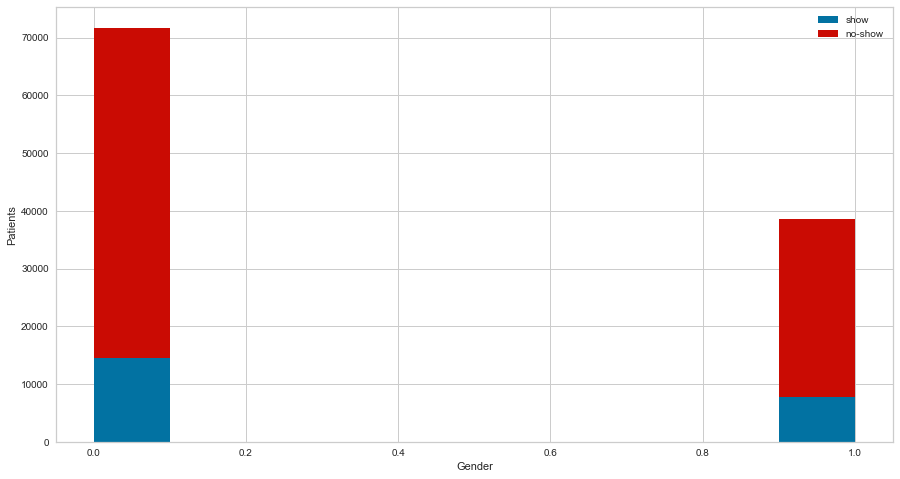

In [203]:
figure = plt.figure(figsize=(15,8))
plt.hist([dataFrame[dataFrame['No_show']==1]['Gender'], dataFrame[dataFrame['No_show']==0]['Gender']], stacked=True, color = ['b','r'],label = ['show','no-show'])
plt.xlabel('Gender')
plt.ylabel('Patients')
plt.legend()

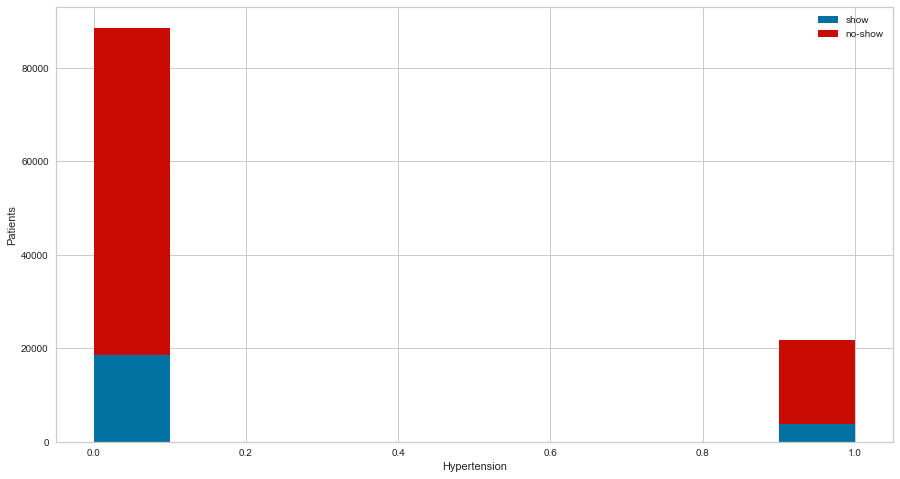

In [204]:
figure = plt.figure(figsize=(15,8))
plt.hist([dataFrame[dataFrame['No_show']==1]['Hypertension'], dataFrame[dataFrame['No_show']==0]['Hypertension']], stacked=True, color = ['b','r'],label = ['show','no-show'])
plt.xlabel('Hypertension')
plt.ylabel('Patients')
plt.legend()

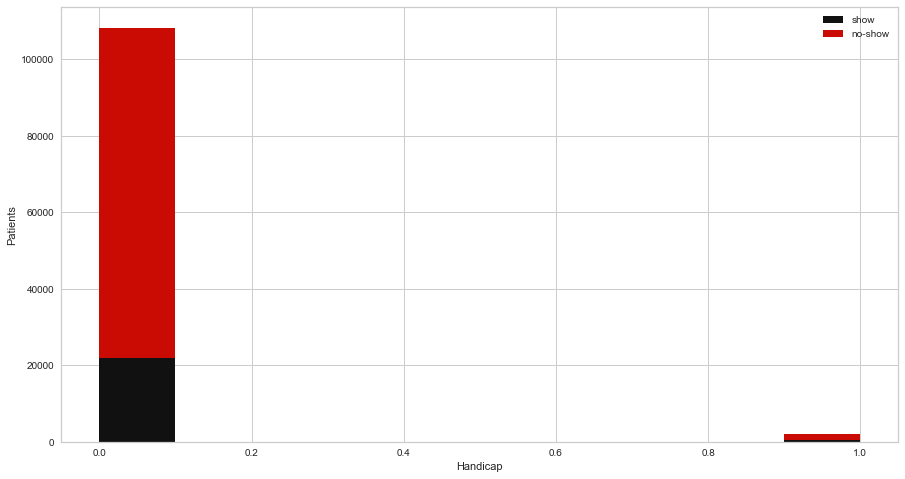

In [205]:
figure = plt.figure(figsize=(15,8))
plt.hist([dataFrame[dataFrame['No_show']==1]['Handicap'], dataFrame[dataFrame['No_show']==0]['Handicap']], stacked=True, color = ['k','r'],label = ['show','no-show'])
plt.xlabel('Handicap')
plt.ylabel('Patients')
plt.legend()

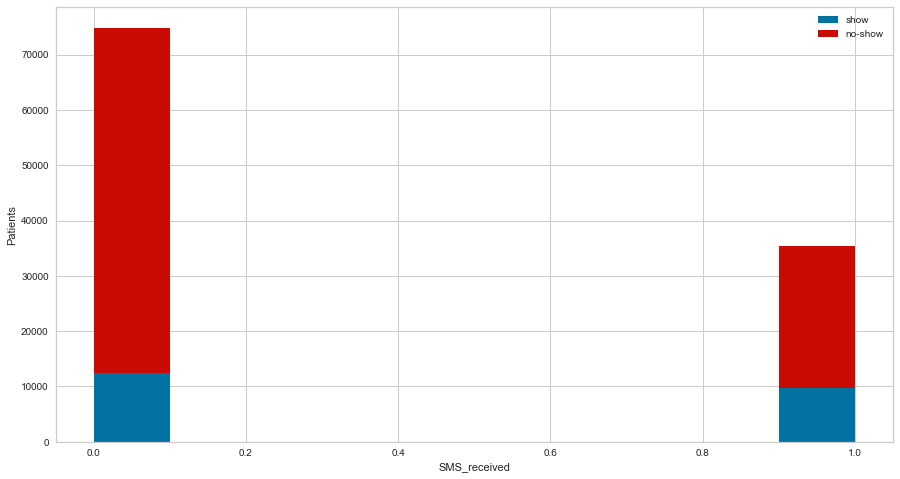

In [280]:
figure = plt.figure(figsize=(15,8))
plt.hist([dataFrame[dataFrame['No_show']==1]['SMS_received'], dataFrame[dataFrame['No_show']==0]['SMS_received']], stacked=True, color = ['b','r'],label = ['show','no-show'])
plt.xlabel('SMS_received')
plt.ylabel('Patients')
plt.legend()

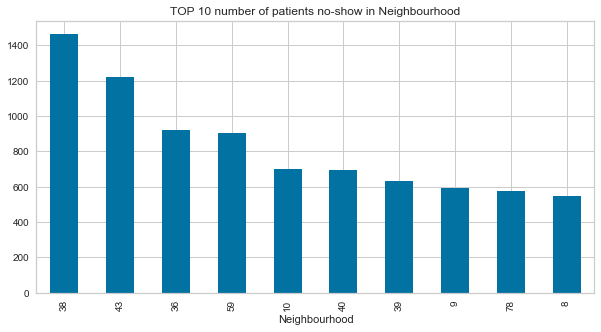

In [271]:
#Number of no-show patients in each hospital
Nbr_noshow = dataFrame.groupby('Neighbourhood').sum()['No_show']
top10_noshow = Nbr_noshow.sort_values(ascending=False).head(10)

top10_noshow.plot(kind='bar',figsize=(10,5),\
                  title = 'TOP 10 number of patients no-show in Neighbourhood')

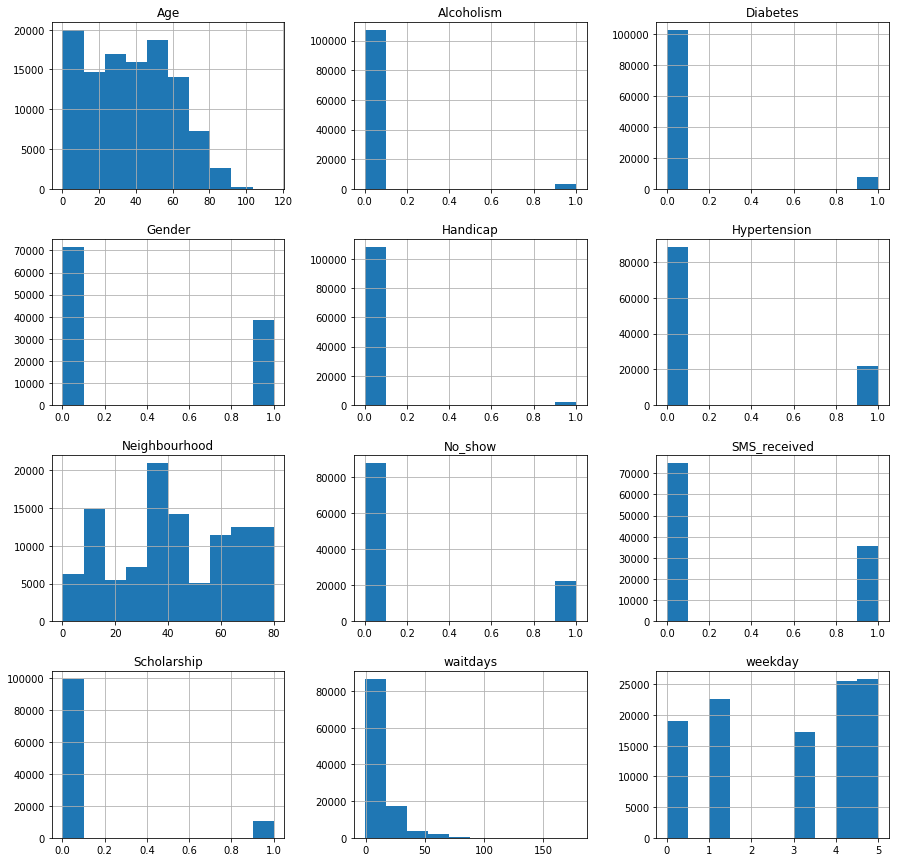

In [35]:
dataFrame.hist(figsize=(15,15))
plt.show()

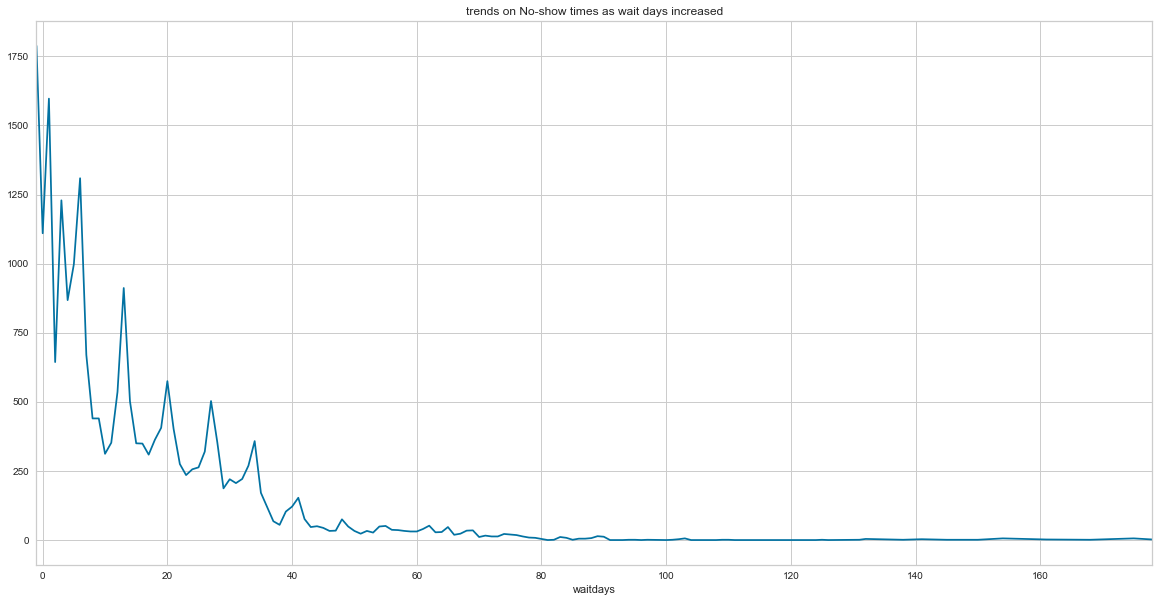

In [273]:
no_show = 
wait_noshow = dataFrame.groupby('waitdays').sum()['No_show']
wait_noshow.plot(figsize=(20,10),title='trends on No-show times as wait days increased')

In [36]:
# new_data = dataFrame
# new_data["status"] = new_data["No_show"]
# new_data=new_data.drop(["No_show"],axis=1)
# new_data.head()
# new_data.status.value_counts()

In [37]:
 # # Correlation matrix
# corrmat = new_data.corr()
# plt.figure(figsize=(14,14))
# sns.heatmap(corrmat,cmap='viridis',annot=True,linewidths=0.5,)

In [38]:

# Get all the columns from the dataFrame
columns = dataFrame.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["No_show"]]

# Store the variable we'll be predicting on
target = "No_show"

X = dataFrame[columns]
y = dataFrame[target]

# Print shapes
print(X.shape)
print(y.shape)

(110322, 11)
(110322,)


## Dealing with Imbalanced Data:

### Techniques used:

1. UnderSampling (NearMiss).
2. OverSampling (RandomOverSampler).
3. CombineSampling (SMOTETomek).
4. OverSampling (SMOTE).

In [40]:
from imblearn.under_sampling import NearMiss

In [41]:
nm = NearMiss(sampling_strategy=1)
X_res,y_res = nm.fit_sample(X,y)
X_res.shape,y_res.shape

((44546, 11), (44546,))

In [42]:
from collections import Counter

print("original {}".format(Counter(y)))
print("resampled {}".format(Counter(y_res)))

original Counter({0: 88049, 1: 22273})
resampled Counter({0: 22273, 1: 22273})


In [43]:
from imblearn.over_sampling import RandomOverSampler

In [44]:
os = RandomOverSampler(sampling_strategy=1)

In [45]:
X_train_res,y_train_res = os.fit_sample(X,y)
X_train_res.shape,y_train_res.shape

((176098, 11), (176098,))

In [46]:
print("original {}".format(Counter(y)))
print("resampled {}".format(Counter(y_train_res)))

original Counter({0: 88049, 1: 22273})
resampled Counter({0: 88049, 1: 88049})


In [47]:
from imblearn.combine import SMOTETomek

In [48]:
os_us = SMOTETomek(sampling_strategy=1)
X_train_res1,y_train_res1 = os_us.fit_sample(X,y)
X_train_res1.shape,y_train_res1.shape

((171324, 11), (171324,))

In [49]:
print("original {}".format(Counter(y)))
print("resampled {}".format(Counter(y_train_res1)))

original Counter({0: 88049, 1: 22273})
resampled Counter({0: 85662, 1: 85662})


In [50]:
print(X.loc[20])
print(y.loc[20])

Gender            0
Age              30
Neighbourhood    50
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
weekday           0
waitdays          1
Name: 20, dtype: int64
1


In [51]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Creating X and y datasets for training

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_train_res,y_train_res, test_size = 0.3, shuffle=True)

In [52]:
#Specify the testing option
seed= 5
scoring = 'accuracy'

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(123268, 11) (52830, 11)
(123268,) (52830,)


In [53]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [54]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
#Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(max_depth=500, n_estimators = 100)))
# models.append(('NN', MLPClassifier(alpha=1)))
models.append(('ADB', AdaBoostClassifier( n_estimators = 100)))
models.append(("XGB", XGBClassifier(max_depth=500)))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[0.73837917 0.73416079 0.74308429 0.73781131 0.74089397 0.73416079
 0.7391904  0.73878478 0.73722213 0.73219211]
KNN: 0.737588 (0.003139)
[0.84440659 0.8448122  0.851951   0.84878722 0.84643466 0.84878722
 0.84805711 0.84813823 0.85299367 0.84593542]
CART: 0.848030 (0.002676)
[0.85178876 0.85925205 0.86509289 0.86136124 0.86217247 0.85981991
 0.86176685 0.86363268 0.8624858  0.86029531]
RFC: 0.860767 (0.003424)
[0.67153403 0.66910035 0.68564939 0.67664476 0.67753711 0.66950596
 0.67583354 0.68094427 0.67231868 0.6751582 ]
ADB: 0.675423 (0.004909)
[0.85762959 0.85633163 0.86330819 0.86063113 0.86533625 0.86274033
 0.8619291  0.86566074 0.86321597 0.85940289]
XGB: 0.861619 (0.002944)


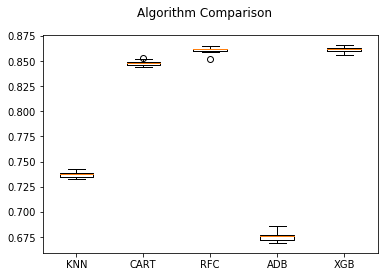

In [55]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [56]:
clf = DecisionTreeClassifier()
clf=clf.fit(X_train, y_train)
# feat=(clf.feature_importances_)
pred=clf.predict(X_test)
print(pred[:10])
print(y_test[:10])


[0 0 0 1 1 1 0 1 0 1]
79067     0
95263     0
17751     0
126402    1
152322    1
171463    1
75823     0
148578    1
42571     0
125833    1
Name: No_show, dtype: int32


In [57]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.8588491387469241


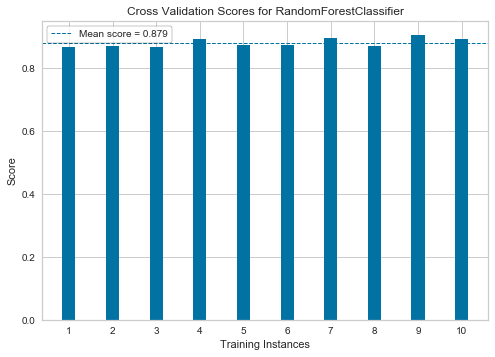

In [58]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

_, ax = plt.subplots()

cv = StratifiedKFold(10)

oz = CVScores(RandomForestClassifier(max_depth=500, n_estimators = 100), ax=ax, cv=cv, scoring= 'accuracy')
oz.fit(X_train_res,y_train_res)
oz.poof()

In [59]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.7489494605337876
              precision    recall  f1-score   support

           0       0.81      0.65      0.72     26467
           1       0.71      0.85      0.77     26363

    accuracy                           0.75     52830
   macro avg       0.76      0.75      0.75     52830
weighted avg       0.76      0.75      0.75     52830

CART
0.8577512776831345
              precision    recall  f1-score   support

           0       0.93      0.78      0.85     26467
           1       0.81      0.94      0.87     26363

    accuracy                           0.86     52830
   macro avg       0.87      0.86      0.86     52830
weighted avg       0.87      0.86      0.86     52830

RFC
0.8741434790838539
              precision    recall  f1-score   support

           0       0.94      0.80      0.86     26467
           1       0.82      0.95      0.88     26363

    accuracy                           0.87     52830
   macro avg       0.88      0.87      0.87     52830
weig

In [60]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1)

ensemble.fit(X_train, y_train)

predictions = ensemble.score(X_test, y_test)*100


print("The Voting Classifier Accuracy is: ", predictions)

The Voting Classifier Accuracy is:  85.43062653795192


Text(0.5,29.5,'Predicted label')

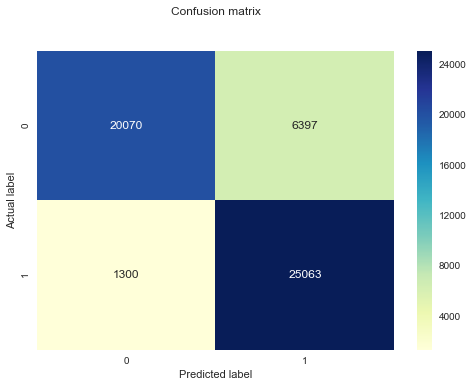

In [61]:
from sklearn.metrics import  confusion_matrix
predict = ensemble.predict(X_test)
# print("=== Confusion Matrix ===")
# print(confusion_matrix(y_test, predict))
# print('\n')

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [63]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [64]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Model: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Model: ROC AUC=0.945


In [65]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

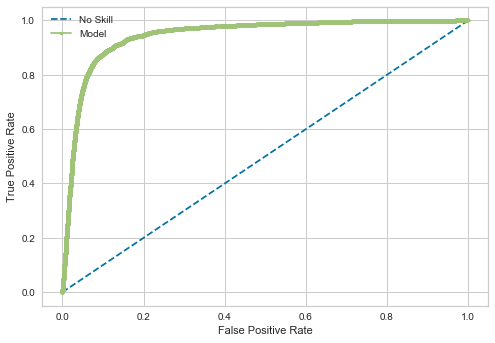

In [66]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [67]:
labels=dataFrame.pop("No_show")

In [68]:
labels.shape

(110322,)

In [69]:
from imblearn.over_sampling import SMOTE

dataf_new,label_new=SMOTE(random_state=3).fit_sample(dataFrame,labels)
dataf_new=pd.DataFrame(dataf_new)
label_new=pd.DataFrame(label_new)

In [70]:
dataf_new.shape

(176098, 11)

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(dataf_new, label_new, test_size=0.20, random_state=42)

In [76]:
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [77]:
#Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(max_depth=500, n_estimators = 100)))
# models.append(('NN', MLPClassifier(alpha=1)))
models.append(('ADB', AdaBoostClassifier()))
models.append(("XGB", XGBClassifier(max_depth=500)))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train1, y_train1, cv=kfold, scoring=scoring)
    print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[0.78009654 0.78272288 0.77910278 0.78208404 0.77853492 0.77761215
 0.77590857 0.77292731 0.77958401 0.78760559]
KNN: 0.779618 (0.003791)
[0.77441794 0.77754117 0.77860591 0.77526973 0.77030097 0.77860591
 0.77491482 0.77668938 0.77638958 0.77404699]
CART: 0.775678 (0.002368)
[0.80785065 0.80245599 0.79549972 0.80373367 0.80153322 0.80295287
 0.79954571 0.8003975  0.80251296 0.80123518]
RFC: 0.801772 (0.002996)
[0.72231687 0.72437535 0.71344407 0.72111016 0.71749006 0.72153606
 0.7161414  0.71386996 0.71832186 0.71789593]
ADB: 0.718650 (0.003448)
[0.8133163  0.81196763 0.80962521 0.8128904  0.80891539 0.81360023
 0.80998012 0.8096962  0.80826294 0.81053454]
XGB: 0.810879 (0.001821)
